LINEAR REGRESSION MODEL

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

dataset = pd.read_csv("Data/Housing.csv")

In [31]:
print(dataset.info())
print("The Head: \n")
print(dataset.head(5))
print(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB
None
The Head: 

   price      area    bedrooms   bathrooms   stories   mainroad   guestroom   \
0   13300000    7420      

In [32]:
# Checking the size of the dataset

print(dataset.shape)

print("Checking information on the dataset \n", dataset.describe())

print("Checking if there are missing data \n\n", dataset.isnull().sum())



(545, 13)
Checking information on the dataset 
           price            area     bedrooms   bathrooms     stories   \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         parking   
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
Checking if there are missing data 

 price               0
area                0
bedrooms            0
bathrooms 

It could be seen that there are no missing data in the Data Set.

I will now check for the data types 

In [33]:
print("Data Types of the dataset \n", dataset.dtypes)

Data Types of the dataset 
 price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


In [34]:
# Changing the object data type to category

for col in dataset.select_dtypes(include=["object"]).columns:
    dataset[col] = dataset[col].astype('category')

print ("Data Types of the dataset after conversion \n", dataset.dtypes)    

Data Types of the dataset after conversion 
 price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


Currently encountering error with the Data because there are space after the naming conventions of each column.

I will perform a data cleaning stage again where all the spaces are removed.

In [50]:
# Removing the spaces after the column names

dataset.columns = dataset.columns.str.replace(' ', '')

print("The columns after removing the spaces \n", dataset.columns)

The columns after removing the spaces 
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


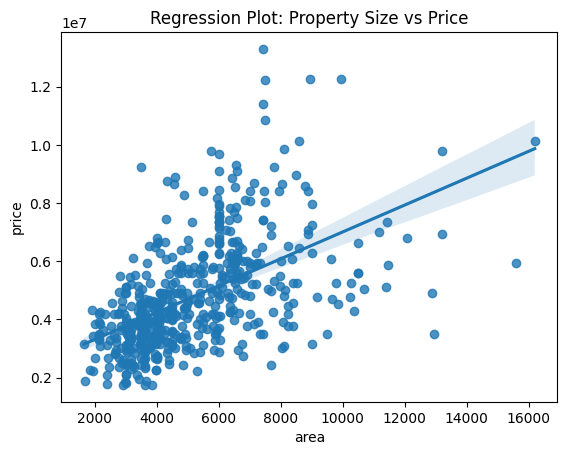

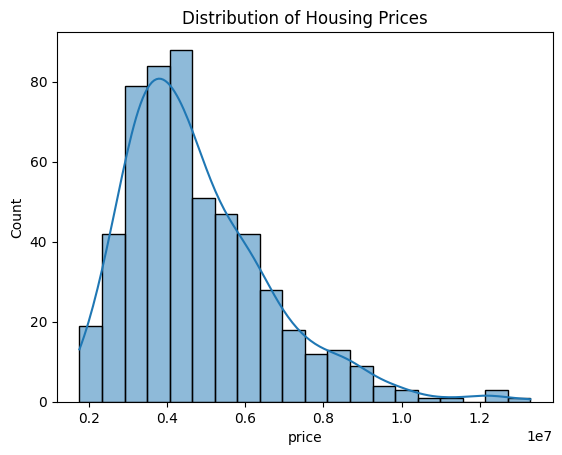

In [55]:
sns.regplot(x='area', y='price', data=dataset)
plt.title("Regression Plot: Property Size vs Price")
plt.show()


sns.histplot(dataset['price'], kde=True, bins=20)
plt.title("Distribution of Housing Prices")
plt.show()



In [56]:
# Perfoming Encoding on the data using the Label Encoding Method

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in dataset.select_dtypes(include=['category']).columns:
    dataset[col] = le.fit_transform(dataset[col])


In [57]:
print(dataset.head(20))

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         4         

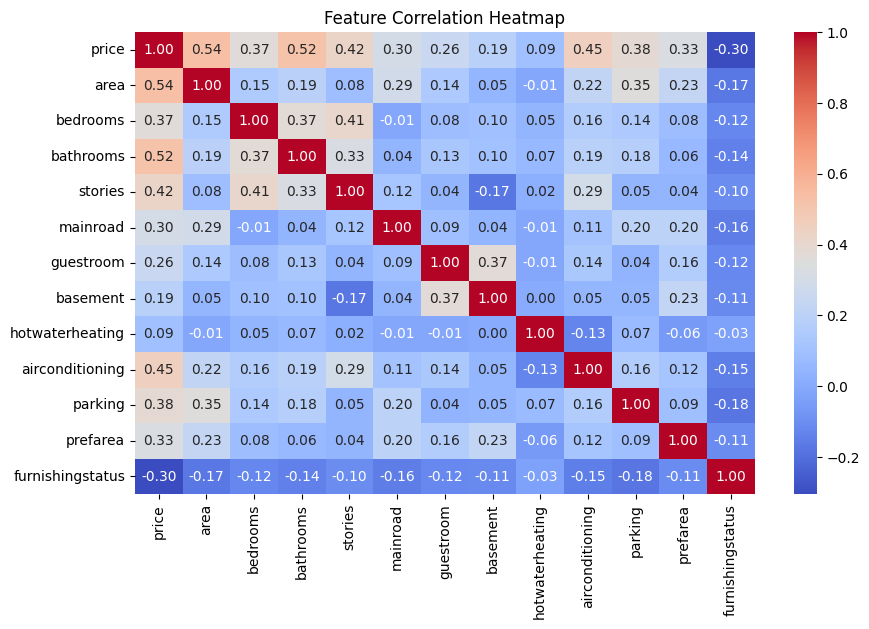

In [58]:
# Performing Regression Analoysis using a heat map

plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [59]:
# Splitting Data into training and testing sets

from sklearn.model_selection import train_test_split

# Select Features (X) and Target Variable (y)
X = dataset.drop(columns=['price'])  # Drop target variable
y = dataset['price']  # Target variable

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (436, 12)
Testing set size: (109, 12)


In [61]:
# Train a linear regression Model

from sklearn.linear_model import LinearRegression

# Initialize Model
lr_model = LinearRegression()

# Train Model
lr_model.fit(X_train, y_train)

# Predict on Test Set
y_pred = lr_model.predict(X_test)


In [62]:
#Evaluating the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")


Mean Absolute Error (MAE): 979679.6912959905
Mean Squared Error (MSE): 1771751116594.0347
Root Mean Squared Error (RMSE): 1331071.4167895105
R-squared (R2 Score): 0.6494754192267804


📌 Interpretation of  Model's Performance

1️⃣ Mean Absolute Error (MAE): 979,679.69
On average, your predictions deviate from actual house prices by about $980K.
Lower MAE means better performance.
2️⃣ Mean Squared Error (MSE): 1,771,751,116,594.03 (~1.77 Trillion)
This is the average squared difference between actual and predicted values.
Because it squares the errors, it penalizes large errors more than small ones.
3️⃣ Root Mean Squared Error (RMSE): 1,331,071.42 (~1.33M)
This is the square root of MSE, which makes it more interpretable in terms of the target variable (price).
It means that typical prediction errors are around $1.33M, which is quite high.
4️⃣ R-squared (R² Score): 0.649 (~65%)
This means your model explains 65% of the variance in housing prices.
R² ranges from 0 to 1, where 1 is a perfect fit.
A score of 0.65 is decent but leaves room for improvement.

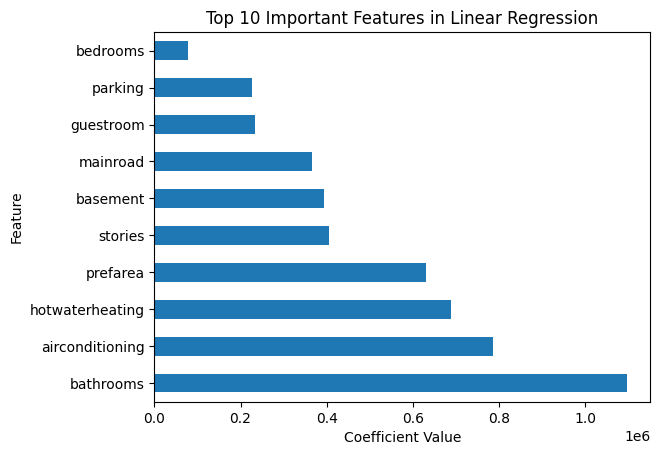

In [ ]:
#Top 10 features 

# Extract Feature Importance using Coefficients
feature_importance = pd.Series(lr_model.coef_, index=X.columns)

# Plot the top 10 important features
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features in Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [68]:
import joblib

# Save Model
joblib.dump(lr_model, "housing_price_model.pkl")

# Load Model (for future predictions)
loaded_model = joblib.load("housing_price_model.pkl")
